In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import fbprophet
%matplotlib inline

In [2]:
df=pd.read_csv(r'E:\Book2.csv')
df.head(10)

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587
5,1960-06,13791
6,1960-07,9498
7,1960-08,8251
8,1960-09,7049
9,1960-10,9545


In [40]:
df.tail()

,ds,y
103,1968-08-01,16722
104,1968-09-01,14385
105,1968-10-01,21342
106,1968-11-01,17180
107,1968-12-01,14577


<AxesSubplot:>

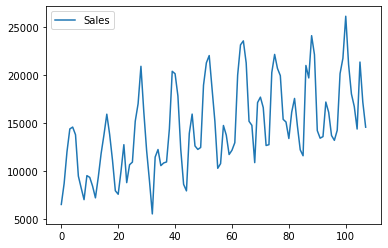

In [4]:
df.plot()

In [5]:
df.isnull().sum()

Month    0
Sales    0
dtype: int64

In [6]:
df.columns =['ds' , 'y']
df.head()

,ds,y
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


In [7]:
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,ds,y
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587


<AxesSubplot:>

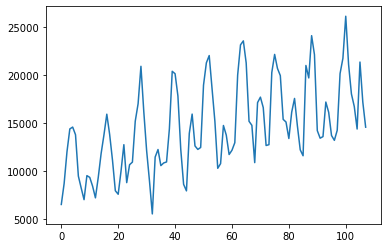

In [8]:
df['y'].plot()

<AxesSubplot:>

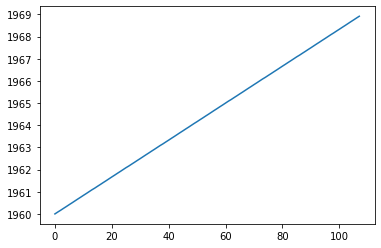

In [9]:
df['ds'].plot()

In [10]:
df.tail()

,ds,y
103,1968-08-01,16722
104,1968-09-01,14385
105,1968-10-01,21342
106,1968-11-01,17180
107,1968-12-01,14577


In [11]:
from fbprophet import Prophet

In [12]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [13]:
model=Prophet()

In [14]:
df.columns


Index(['ds', 'y'], dtype='object')

In [15]:
df.dropna(axis=1, inplace=True)

In [16]:
df.head(10)

,ds,y
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587
5,1960-06-01,13791
6,1960-07-01,9498
7,1960-08-01,8251
8,1960-09-01,7049
9,1960-10-01,9545


In [17]:
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [18]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [19]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [20]:
future_date = model.make_future_dataframe(periods=365)

In [21]:
future_date.tail()

,ds
468,1969-11-27
469,1969-11-28
470,1969-11-29
471,1969-11-30
472,1969-12-01


In [22]:
future_date

,ds
0,1960-01-01
1,1960-02-01
2,1960-03-01
3,1960-04-01
4,1960-05-01
...,...
468,1969-11-27
469,1969-11-28
470,1969-11-29
471,1969-11-30


In [23]:
prediction = model.predict(future_date)

In [24]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1960-01-01,9600.274043,4671.942631,7620.942288,9600.274043,9600.274043,-3464.315527,-3464.315527,-3464.315527,-3464.315527,-3464.315527,-3464.315527,0.0,0.0,0.0,6135.958515
1,1960-02-01,9704.265356,5216.208537,8258.867186,9704.265356,9704.265356,-2952.452083,-2952.452083,-2952.452083,-2952.452083,-2952.452083,-2952.452083,0.0,0.0,0.0,6751.813273
2,1960-03-01,9801.547552,11232.826840,14308.494889,9801.547552,9801.547552,2943.121970,2943.121970,2943.121970,2943.121970,2943.121970,2943.121970,0.0,0.0,0.0,12744.669521
3,1960-04-01,9905.538865,13233.181721,16301.945863,9905.538865,9905.538865,4911.905978,4911.905978,4911.905978,4911.905978,4911.905978,4911.905978,0.0,0.0,0.0,14817.444842
4,1960-05-01,10006.175619,14666.860601,17850.997332,10006.175619,10006.175619,6158.054189,6158.054189,6158.054189,6158.054189,6158.054189,6158.054189,0.0,0.0,0.0,16164.229808


In [25]:
prediction.isnull().sum()

ds                            0
trend                         0
yhat_lower                    0
yhat_upper                    0
trend_lower                   0
trend_upper                   0
additive_terms                0
additive_terms_lower          0
additive_terms_upper          0
yearly                        0
yearly_lower                  0
yearly_upper                  0
multiplicative_terms          0
multiplicative_terms_lower    0
multiplicative_terms_upper    0
yhat                          0
dtype: int64

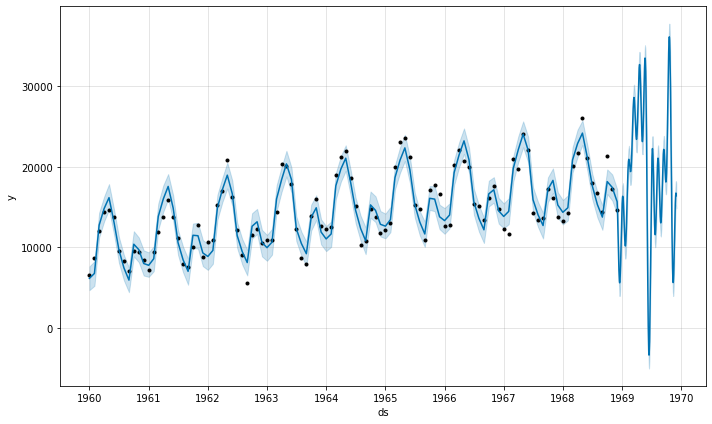

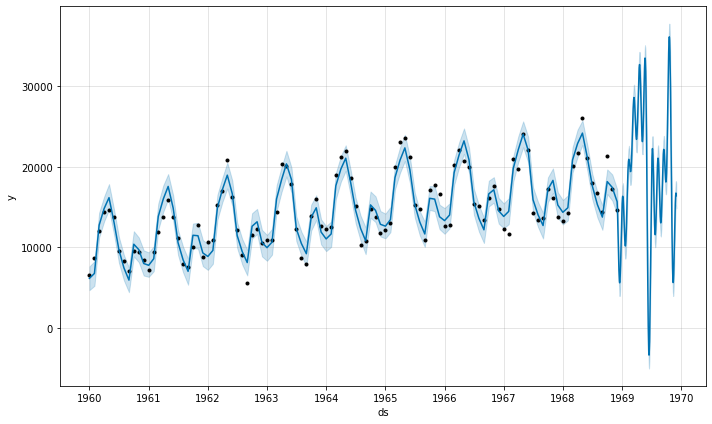

In [26]:
model.plot(prediction)

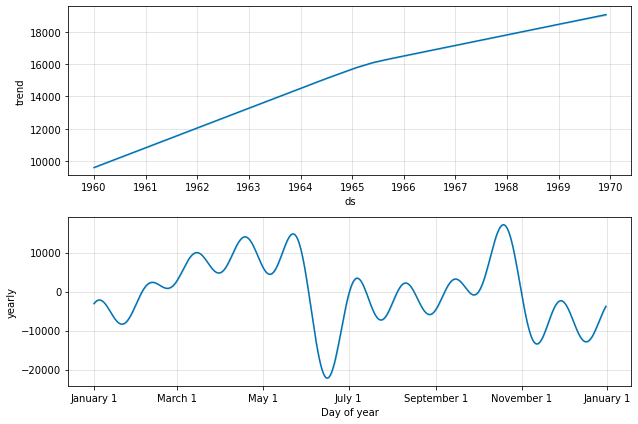

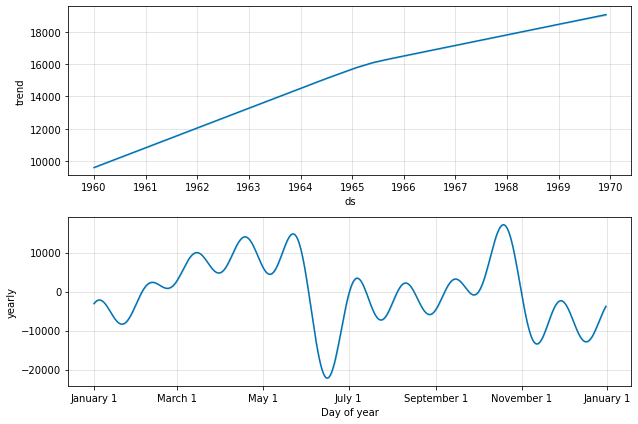

In [27]:
model.plot_components(prediction)

In [28]:
 from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model,initial='730 days', period='180 days' , horizon='365 days')
df_cv.head()

INFO:fbprophet:Making 13 forecasts with cutoffs between 1962-01-02 00:00:00 and 1967-12-02 00:00:00


  0%|          | 0/13 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1962-02-01,11681.819519,11316.661123,12025.962528,10947,1962-01-02
1,1962-03-01,14642.193471,14310.107296,14982.013812,15200,1962-01-02
2,1962-04-01,16139.556237,15797.524388,16485.801336,17010,1962-01-02
3,1962-05-01,20238.613314,19887.736035,20607.145619,20900,1962-01-02
4,1962-06-01,16914.244777,16540.408666,17270.354279,16205,1962-01-02


In [29]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
151,1968-08-01,14785.202921,13263.942292,16409.861776,16722,1967-12-02
152,1968-09-01,13521.380462,11940.506708,15115.971921,14385,1967-12-02
153,1968-10-01,17058.033194,15434.534012,18649.548379,21342,1967-12-02
154,1968-11-01,17418.680753,15981.708367,18989.045531,17180,1967-12-02
155,1968-12-01,15808.948407,14202.045985,17360.779219,14577,1967-12-02


In [30]:
from fbprophet.diagnostics import performance_metrics
df_p=performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,36 days,2.421498e+06,1556.116198,1378.675045,0.114238,0.108456,0.333333
1,40 days,2.415356e+06,1554.141653,1365.647825,0.112929,0.108456,0.333333
2,42 days,2.738570e+06,1654.862493,1442.174637,0.121946,0.108456,0.333333
3,46 days,2.950182e+06,1717.609504,1519.872257,0.127711,0.114265,0.266667
4,47 days,3.165811e+06,1779.272483,1614.510975,0.134172,0.125212,0.200000


G:\Ananconda\lib\site-packages\fbprophet\plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
G:\Ananconda\lib\site-packages\fbprophet\plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


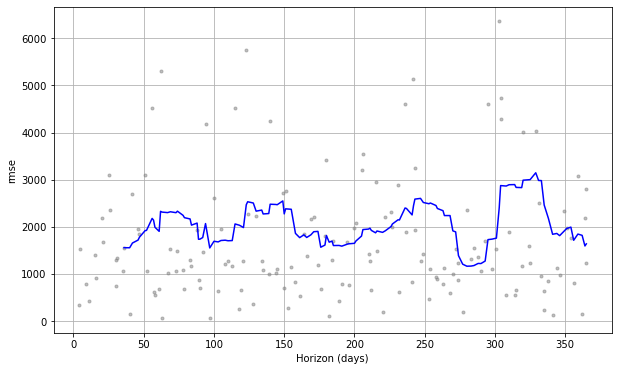

In [31]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv,metric='rmse')

In [39]:
import joblib

In [41]:
joblib.dump(model,'model_saved')

['model_saved']

In [44]:
load=joblib.load('model_saved')

In [57]:
load.predict()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1960-01-01,9600.274043,4520.986415,7717.451399,9600.274043,9600.274043,-3464.315527,-3464.315527,-3464.315527,-3464.315527,-3464.315527,-3464.315527,0.0,0.0,0.0,6135.958515
1,1960-02-01,9704.265356,5212.260509,8309.617536,9704.265356,9704.265356,-2952.452083,-2952.452083,-2952.452083,-2952.452083,-2952.452083,-2952.452083,0.0,0.0,0.0,6751.813273
2,1960-03-01,9801.547552,11116.181281,14407.816421,9801.547552,9801.547552,2943.121970,2943.121970,2943.121970,2943.121970,2943.121970,2943.121970,0.0,0.0,0.0,12744.669521
3,1960-04-01,9905.538865,13224.555614,16264.130356,9905.538865,9905.538865,4911.905978,4911.905978,4911.905978,4911.905978,4911.905978,4911.905978,0.0,0.0,0.0,14817.444842
4,1960-05-01,10006.175619,14675.442612,17713.010595,10006.175619,10006.175619,6158.054189,6158.054189,6158.054189,6158.054189,6158.054189,6158.054189,0.0,0.0,0.0,16164.229808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,1968-08-01,18189.575169,13753.792605,16813.200184,18189.575169,18189.575169,-2875.677231,-2875.677231,-2875.677231,-2875.677231,-2875.677231,-2875.677231,0.0,0.0,0.0,15313.897937
104,1968-09-01,18245.001179,12263.211629,15419.562389,18245.001179,18245.001179,-4497.670917,-4497.670917,-4497.670917,-4497.670917,-4497.670917,-4497.670917,0.0,0.0,0.0,13747.330262
105,1968-10-01,18298.639253,16608.521904,19647.752591,18298.639253,18298.639253,-139.502710,-139.502710,-139.502710,-139.502710,-139.502710,-139.502710,0.0,0.0,0.0,18159.136542
106,1968-11-01,18354.065263,15810.204135,18935.946649,18354.065263,18354.065263,-921.244829,-921.244829,-921.244829,-921.244829,-921.244829,-921.244829,0.0,0.0,0.0,17432.820434
